## BSSD5350 Homework 10.1 - CNN Train
Taken From: hhttps://github.com/chhayac/Machine-Learning-Notebooks/blob/master/Recognizing-CIFAR-10-images-Improved-Model-Data-Augmentation.ipynb

In [32]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [34]:
BATCH_SIZE = 128
nb_epochs = 40
VALIDATION_SPLIT = 0.2
num_classes = 10

In [35]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [36]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [37]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

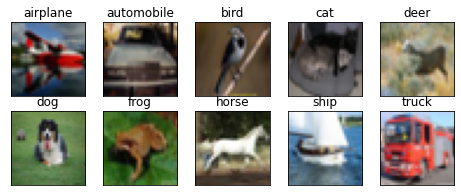

In [38]:
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

One hot Encoding

In [39]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [40]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [41]:
# Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [42]:
model = create_cnn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

Compiling the model

In [43]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

Training the model

In [44]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, 
          validation_split = VALIDATION_SPLIT, verbose = 1)

Epoch 1/40
313/313 [==============================] - 47s 150ms/step - loss: 1.7724 - accuracy: 0.3571 - val_loss: 1.4144 - val_accuracy: 0.4866
Epoch 2/40
313/313 [==============================] - 53s 168ms/step - loss: 1.3361 - accuracy: 0.5243 - val_loss: 1.1918 - val_accuracy: 0.5815
Epoch 3/40
313/313 [==============================] - 58s 187ms/step - loss: 1.1424 - accuracy: 0.5982 - val_loss: 1.1471 - val_accuracy: 0.6004
Epoch 4/40
313/313 [==============================] - 68s 219ms/step - loss: 0.9982 - accuracy: 0.6495 - val_loss: 0.8884 - val_accuracy: 0.6896
Epoch 5/40
313/313 [==============================] - 69s 221ms/step - loss: 0.9060 - accuracy: 0.6819 - val_loss: 0.8219 - val_accuracy: 0.7148
Epoch 6/40
313/313 [==============================] - 68s 217ms/step - loss: 0.8257 - accuracy: 0.7128 - val_loss: 0.8226 - val_accuracy: 0.7157
Epoch 7/40
313/313 [==============================] - 68s 217ms/step - loss: 0.7648 - accuracy: 0.7328 - val_loss: 0.7418 - val_ac

List all data in history

In [45]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Summarize history for accuracy

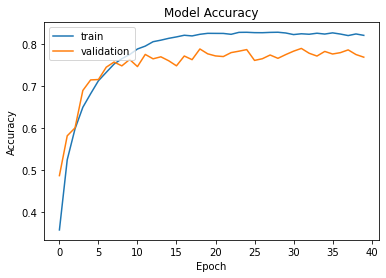

In [46]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for loss

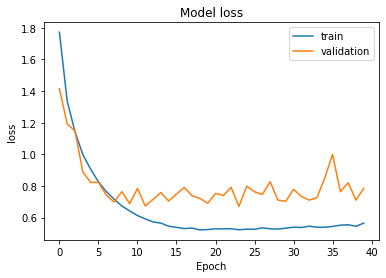

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [48]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

79/79 [==============================] - 4s 54ms/step - loss: 0.8342 - accuracy: 0.7693


In [49]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Loss 0.8341646194458008
Test accuracy 0.7692999839782715


## Performing Data Augmentation
Taken From: hhttps://github.com/chhayac/Machine-Learning-Notebooks/blob/master/Recognizing-CIFAR-10-images-Improved-Model-Data-Augmentation.ipynb

In [50]:
from keras.preprocessing.image import ImageDataGenerator

In [51]:
# load dataset
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Augmenting training set images
datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
datagen.fit(X_train)

In [52]:
model_aug = create_cnn_model()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [53]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
import h5py as h5py

In [54]:
lr = 0.01
def learning_rate_decay(epoch):
    return lr * (0.1 ** int(epoch / 10)) 

In [55]:
model_history = model_aug.fit_generator(datagen.flow(X_train, y_train, 
                                                     batch_size = BATCH_SIZE), 
                                        steps_per_epoch = X_train.shape[0] / BATCH_SIZE,
                                        epochs = nb_epochs, verbose = 1,
                                        validation_data = (X_test, y_test),
                                        callbacks = [ModelCheckpoint('model_aug.h5', save_best_only =True),
                                                     EarlyStopping(monitor='val_accuracy', min_delta=0.000001, patience=10, \
                                                     verbose=1, mode='auto')])

Epoch 1/40
391/390 [==============================] - 103s 262ms/step - loss: 1.7823 - accuracy: 0.3564 - val_loss: 1.3761 - val_accuracy: 0.5163
Epoch 2/40
391/390 [==============================] - 102s 260ms/step - loss: 1.3762 - accuracy: 0.5100 - val_loss: 1.2195 - val_accuracy: 0.5646
Epoch 3/40
391/390 [==============================] - 102s 261ms/step - loss: 1.1923 - accuracy: 0.5820 - val_loss: 1.0104 - val_accuracy: 0.6375
Epoch 4/40
391/390 [==============================] - 103s 263ms/step - loss: 1.0673 - accuracy: 0.6253 - val_loss: 0.8399 - val_accuracy: 0.7024
Epoch 5/40
391/390 [==============================] - 110s 283ms/step - loss: 0.9836 - accuracy: 0.6589 - val_loss: 0.8971 - val_accuracy: 0.6885
Epoch 6/40
391/390 [==============================] - 109s 277ms/step - loss: 0.9308 - accuracy: 0.6773 - val_loss: 0.7997 - val_accuracy: 0.7251
Epoch 7/40
391/390 [==============================] - 107s 274ms/step - loss: 0.8831 - accuracy: 0.6927 - val_loss: 0.8309 -

## Accuracy and Loss curves
Summarize history for Accuracy

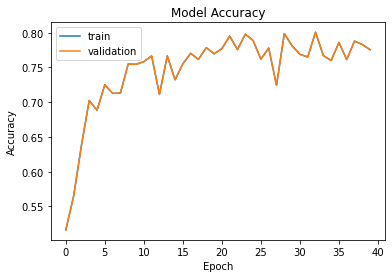

In [56]:
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for Loss

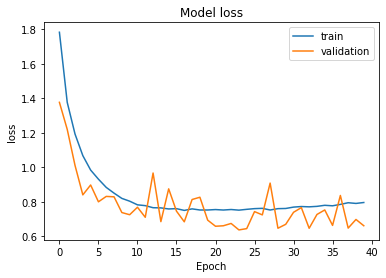

In [57]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [58]:
score = model_aug.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

79/79 [==============================] - 4s 51ms/step - loss: 0.6610 - accuracy: 0.7754


In [59]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Loss 0.6609933376312256
Test accuracy 0.7753999829292297


In [60]:
model.save('saved_models\\scotts-cifar10-cnn')

INFO:tensorflow:Assets written to: saved_models\scotts-cifar10-cnn\assets
